In [196]:
import pandas as pd
import os
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [197]:
! pwd

/cellar/users/mdow/Projects/HCC/RNA_analysis/DESeq_analysis


## Load data

## Mouse

In [4]:
os.listdir('human/')

['group1_vs_2.csv',
 'S2_vs_normal.csv',
 'Hoshida_C2_vs_normal.csv',
 'group1_vs_3.csv',
 'group1_vs_2and3.csv',
 'HCC_vs_normal.csv',
 'S1_vs_normal.csv',
 'Hoshida_C1_vs_normal.csv',
 'group3_vs_1and2.csv',
 'group2_vs_3.csv',
 'S3_vs_normal.csv',
 'Hoshida_C3_vs_normal.csv',
 'group2_vs_1and3.csv']

In [175]:
allFnames = pd.Series(os.listdir('.'))

In [176]:
dseaq_out = allFnames[allFnames.str.contains('_DESeq.csv')].tolist()

In [177]:
dseaq_out

['S3_vs_normal_DESeq.csv',
 'Hoshida_C3_vs_normal_DESeq.csv',
 'Tcga_c3_vs_normal_DESeq.csv',
 'S2_vs_normal_DESeq.csv',
 'HCC_vs_normal_DESeq.csv',
 'Hoshida_C1_vs_normal_DESeq.csv',
 'Tcga_c1_vs_normal_DESeq.csv',
 'S1_vs_normal_DESeq.csv',
 'Tcga_c2_vs_normal_DESeq.csv',
 'Hoshida_C2_vs_normal_DESeq.csv']

## Generate GSEA_prerank files

In [6]:
# https://software.broadinstitute.org/cancer/software/gsea/wiki/index.php/FAQ#Can_I_use_GSEA_to_analyze_SNP.2C_SAGE.2C_ChIP-Seq_or_RNA-Seq_data.3F
# col1:Genes col2: base 2 log FC


In [29]:
def get_rank_out(df,out_fname):
    df['Gene'] = [g.upper() for g in df.index]
    df_rank = df[['Gene','log2FoldChange']]
    df_rank.to_csv(out_fname,sep='\t',index=False,header=None)

In [31]:
for f in dseaq_out:
    tmp = pd.read_csv(f,index_col=0)
    tmp_fname = f.split('_DESeq.csv')[0]
    out_fname = tmp_fname+ '_rank.rnk'
    this_rank = get_rank_out(tmp,out_fname)
     

In [134]:
dseaq_out

['S3_vs_normal_DESeq.csv',
 'Hoshida_C3_vs_normal_DESeq.csv',
 'S2_vs_normal_DESeq.csv',
 'HCC_vs_normal_DESeq.csv',
 'Hoshida_C1_vs_normal_DESeq.csv',
 'S1_vs_normal_DESeq.csv',
 'Hoshida_C2_vs_normal_DESeq.csv']

In [360]:
! pwd

/cellar/users/mdow/Projects/HCC/RNA_analysis/DESeq_analysis


## Volcano plot

In [34]:
def plot_volcano(df,title,p):
    plt.subplots(figsize=(5,5))
    x = df.log2FoldChange
    y = -np.log10(df.padj)
    plt.scatter(x,y,color='black')
    dash_y = -np.log10(0.05)
    plt.plot([min(x)-0.5,max(x)+0.5],[dash_y,dash_y],linestyle='--',color='r')
    
    # Change the x-axis to FC instead of log2
    m1 = df.padj <= p
    m2 = df.log2FoldChange >= 1
    m3 = df.log2FoldChange <= -1
    
    sig_df = df[m1&(m2|m3)]
    x2 = sig_df.log2FoldChange
    y2 = -np.log10(sig_df.padj) 
    plt.scatter(x2, y2, color='r')
    
    # Add lines for threshold
    plt.plot([np.log2(1/1.5),np.log2(1/1.5)],[min(y),max(y)],linestyle='--',color='b')
    plt.plot([np.log2(1.5),np.log2(1.5)],[min(y),max(y)],linestyle='--',color='b')
    
    plt.plot([np.log2(2),np.log2(2)],[min(y),max(y)],linestyle='--',color='r')
    plt.plot([-np.log2(2),-np.log2(2)],[min(y),max(y)],linestyle='--',color='r')
    
    #plt.plot([1/1.5,1/1.5],[min(y),max(y)],linestyle='--',color='b')
    #plt.plot([1.5,1.5],[min(y),max(y)],linestyle='--',color='b')
    
    #plt.plot([2,2],[min(y),max(y)],linestyle='--',color='r')
    #plt.plot([-2,-2],[min(y),max(y)],linestyle='--',color='r')
    
    
    plt.xlabel('log2 FoldChange')
    plt.ylabel('-log10(adjusted p-value)')
    plt.title(title)

In [41]:
tmp[tmp.padj < 0.05].shape

(6077, 6)

In [203]:
tmp.shape

(8528, 6)

## Prolif

(4767, 6)


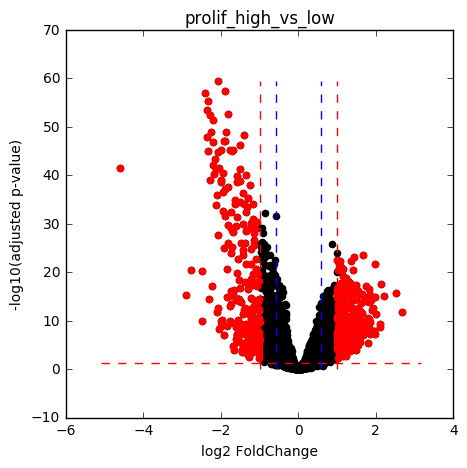

In [204]:
f='prolif_high_vs_low.csv'
v = pd.read_csv(f,index_col=0)
tmp_title = 'prolif_high_vs_low'
padj_thres = 0.05
    
print tmp[tmp.padj < padj_thres].shape
plot_volcano(tmp,tmp_title,padj_thres)
     

In [205]:
tmp['Gene'] =[g.upper() for g in tmp.index]

In [206]:
tmp.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Gene
a1cf,2766.126128,0.171069,0.142185,1.203148,2.289192e-01,3.036117e-01,A1CF
aaas,1573.795881,-0.115936,0.065285,-1.775838,7.575967e-02,1.187677e-01,AAAS
aacs,805.305277,-0.606714,0.120710,-5.026191,5.003163e-07,2.831252e-06,AACS
aadac,13298.383508,1.202318,0.189871,6.332287,2.415534e-10,2.724824e-09,AADAC
aadat,378.474807,0.712120,0.216175,3.294190,9.870562e-04,2.593227e-03,AADAT


In [207]:
immune_genes = ['CD19','MS4A1','FOXP3','IL2RA','LRRC32','TGFB1','HLA-A','HLA-B','HLA-C','HLA-DMA','HLA-DMB',
                'HLA-DOA','HLA-DOB','HLA-DRB1','ARG1','ARG2','CD33','CSF2','CSF3','IDO1','IL10','IL13','IL1B',
                'IL4','IL6','ITGAM','CD274','CD276','CD28','CD80','CD86','CTLA4','HAVCR2','LAG3','LGALS9',
                'PDCD1','PDCD1LG2','VTCN1','CD247','CD3D','CD3E','CD3G','CD4','CD8A','CD8B','CD27','CD70',
                'ICOS','ICOSLG','TNFRSF4','TNFRSF9','TNFSF9','GZMA','GZMB','PRF1','IFNG','IL12A','IL12B','IL2',
               'LTA','TNF','KIR2DL1','KIR2DL4','KIR2DS4','KIR3DL1','KIR3DL2']

In [225]:
tmp_srt = tmp.sort_values(['padj','log2FoldChange'])

In [226]:
tmp_srt['Rank'] = range(1,tmp_srt.shape[0]+1)

In [228]:
tmp_srt[tmp_srt.Gene.isin(immune_genes)]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Gene,Rank
cd3g,31.472425,-1.536390,0.247550,-6.206394,5.421423e-10,5.658984e-09,CD3G,817
hla-dmb,1220.347139,-0.930736,0.176735,-5.266291,1.392073e-07,8.703517e-07,HLA-DMB,1364
cd86,228.506225,-0.684501,0.166423,-4.113016,3.905227e-05,1.431189e-04,CD86,2327
arg1,17838.390043,0.972992,0.237286,4.100510,4.122401e-05,1.499183e-04,ARG1,2345
il1b,53.187694,-0.874410,0.215014,-4.066762,4.767083e-05,1.698149e-04,IL1B,2394
lgals9,1646.359494,-0.666766,0.171570,-3.886254,1.018029e-04,3.374175e-04,LGALS9,2573
cd276,3213.802904,-0.387154,0.100593,-3.848709,1.187419e-04,3.885768e-04,CD276,2606
tgfb1,2029.942517,-0.694095,0.195342,-3.553226,3.805367e-04,1.105696e-03,TGFB1,2935
hla-dma,2797.304544,-0.646029,0.189605,-3.407247,6.562177e-04,1.795964e-03,HLA-DMA,3116
lrrc32,1356.473368,0.398177,0.159202,2.501076,1.238165e-02,2.427374e-02,LRRC32,4350


In [231]:
prolif_sig = tmp_srt[tmp_srt.padj < 0.05]

In [232]:
prolif_sig.shape

(4767, 8)

In [233]:
prolif_sig[prolif_sig.Gene.isin(immune_genes)].sort_values(['padj'])

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Gene,Rank
cd3g,31.472425,-1.536390,0.247550,-6.206394,5.421423e-10,5.658984e-09,CD3G,817
hla-dmb,1220.347139,-0.930736,0.176735,-5.266291,1.392073e-07,8.703517e-07,HLA-DMB,1364
cd86,228.506225,-0.684501,0.166423,-4.113016,3.905227e-05,1.431189e-04,CD86,2327
arg1,17838.390043,0.972992,0.237286,4.100510,4.122401e-05,1.499183e-04,ARG1,2345
il1b,53.187694,-0.874410,0.215014,-4.066762,4.767083e-05,1.698149e-04,IL1B,2394
lgals9,1646.359494,-0.666766,0.171570,-3.886254,1.018029e-04,3.374175e-04,LGALS9,2573
cd276,3213.802904,-0.387154,0.100593,-3.848709,1.187419e-04,3.885768e-04,CD276,2606
tgfb1,2029.942517,-0.694095,0.195342,-3.553226,3.805367e-04,1.105696e-03,TGFB1,2935
hla-dma,2797.304544,-0.646029,0.189605,-3.407247,6.562177e-04,1.795964e-03,HLA-DMA,3116
lrrc32,1356.473368,0.398177,0.159202,2.501076,1.238165e-02,2.427374e-02,LRRC32,4350


In [218]:
prolif_rank = get_rank_out(tmp,'prolif_rank.rnk')

In [217]:
! *rnk

/bin/sh: 1: HCC_vs_normal_rank.rnk: not found


## normal vs. group

S3 (3664, 6)
Hoshida_C3 (3802, 6)
Tcga_c3 (3073, 6)
S2 (2318, 6)
HCC (6134, 6)
Hoshida_C1 (1655, 6)
Tcga_c1 (5965, 6)
S1 (6254, 6)
Tcga_c2 (2365, 6)
Hoshida_C2 (6077, 6)


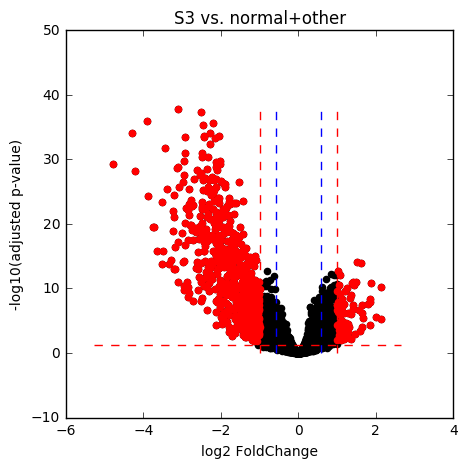

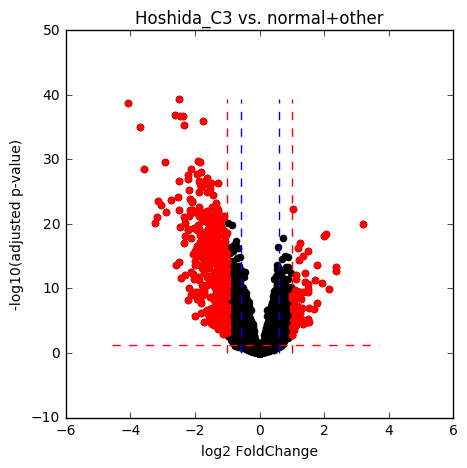

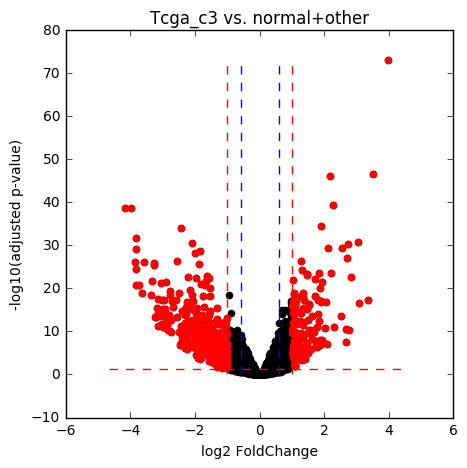

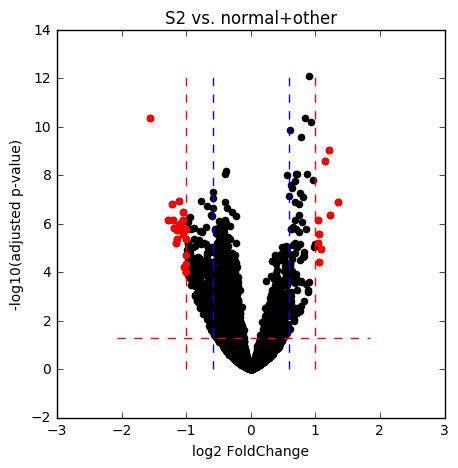

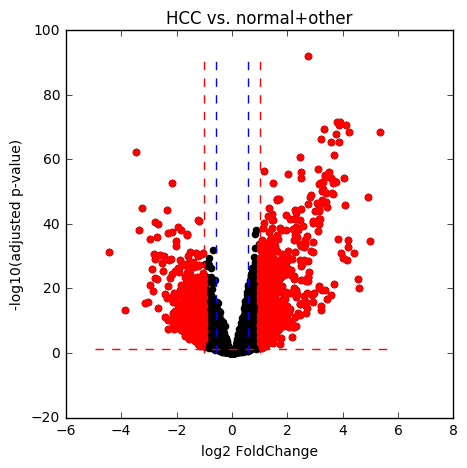

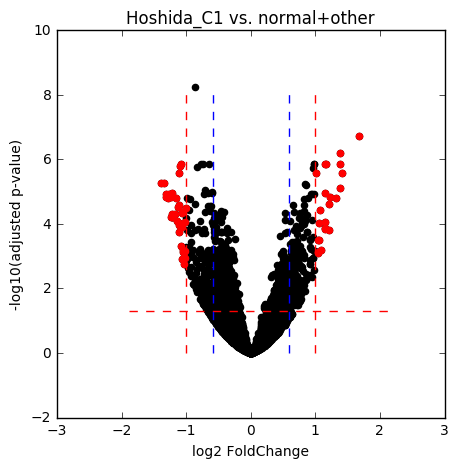

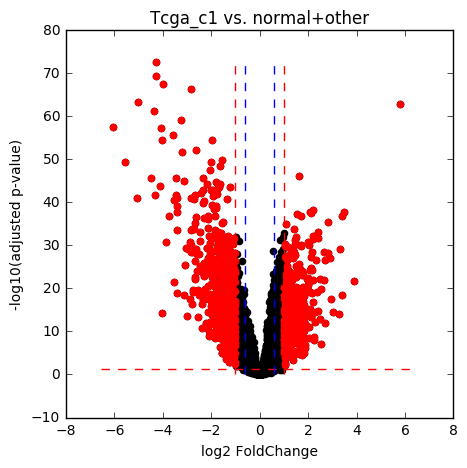

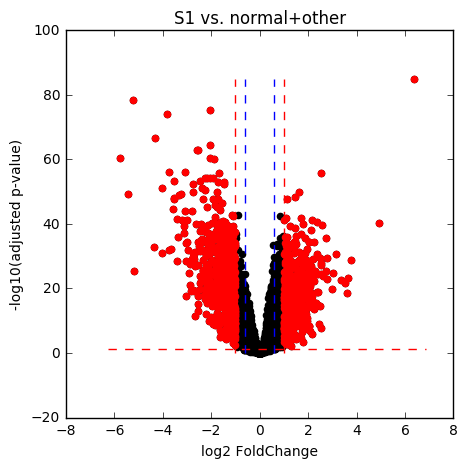

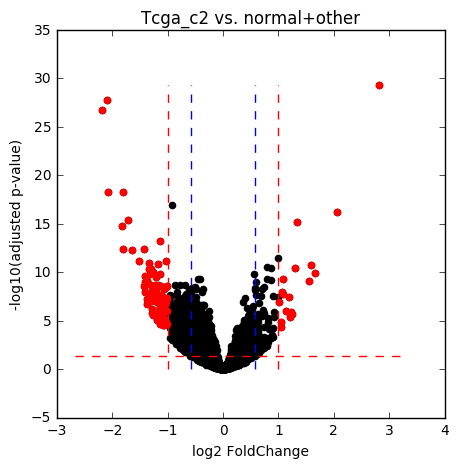

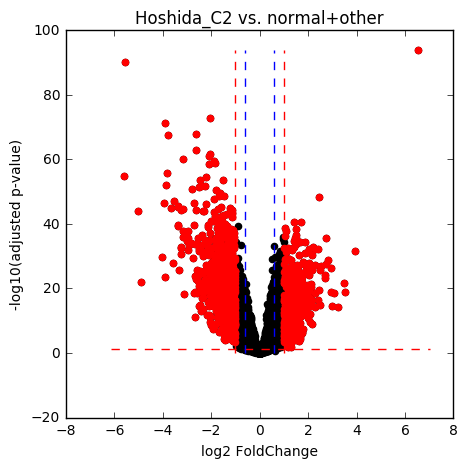

In [179]:
for f in dseaq_out:
    tmp = pd.read_csv(f,index_col=0)
    tmp_fname = f.split('_vs_normal_DESeq.csv')[0]
    tmp_title = tmp_fname + ' vs. normal+other'
    padj_thres = 0.05
    
    print tmp_fname, tmp[tmp.padj < padj_thres].shape
    plot_volcano(tmp,tmp_title,padj_thres)
     

(6134, 6)


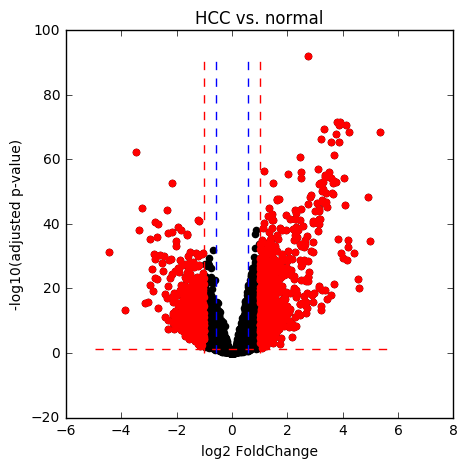

In [50]:
f = 'HCC_vs_normal_DESeq.csv'
tmp = pd.read_csv(f,index_col=0)
tmp_fname = f.split('_vs_normal_DESeq.csv')[0]
tmp_title = tmp_fname + ' vs. normal'
padj_thres = 0.05
    
print tmp[tmp.padj < padj_thres].shape
plot_volcano(tmp,tmp_title,padj_thres)
     

In [51]:
from matplotlib_venn import venn2, venn3

<matplotlib_venn._common.VennDiagram instance at 0x7f941a9b0680>

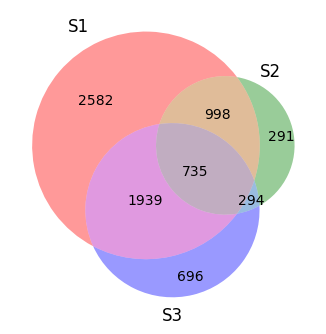

In [66]:
s1 = pd.read_csv('S1_vs_normal_DESeq.csv',index_col=0)
s2 = pd.read_csv('S2_vs_normal_DESeq.csv',index_col=0)
s3 = pd.read_csv('S3_vs_normal_DESeq.csv',index_col=0)

x = set(s1[s1.padj < 0.05].index)
y = set(s2[s2.padj < 0.05].index)
z = set(s3[s3.padj < 0.05].index)

venn3((x,y,z),('S1','S2','S3'))

In [73]:
tmp[tmp.padj < 0.05].index

(6134, 6)

<matplotlib_venn._common.VennDiagram instance at 0x7f941ab33ea8>

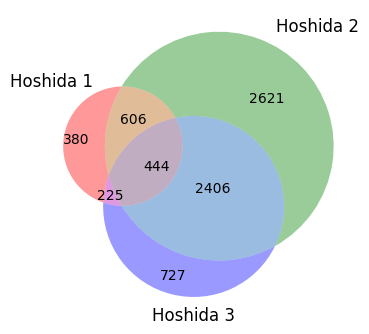

In [64]:
h1 = pd.read_csv('Hoshida_C1_vs_normal_DESeq.csv',index_col=0)
h2 = pd.read_csv('Hoshida_C2_vs_normal_DESeq.csv',index_col=0)
h3 = pd.read_csv('Hoshida_C3_vs_normal_DESeq.csv',index_col=0)

x2 = set(h1[h1.padj < 0.05].index)
y2 = set(h2[h2.padj < 0.05].index)
z2 = set(h3[h3.padj < 0.05].index)

venn3((x2,y2,z2),('Hoshida 1','Hoshida 2','Hoshida 3'))

In [77]:
k=set(tmp[tmp.padj < 0.05].index)

<matplotlib_venn._common.VennDiagram instance at 0x7f944c535908>

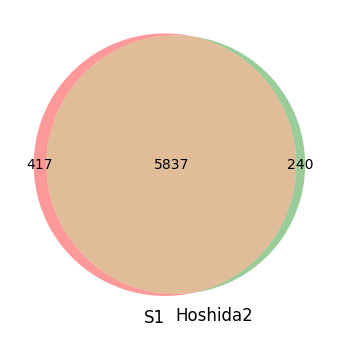

In [78]:
venn2((x,y2),('S1','Hoshida2'))

<matplotlib_venn._common.VennDiagram instance at 0x7f944c8086c8>

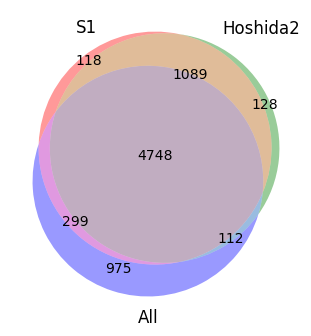

In [79]:
venn3((x,y2,k),('S1','Hoshida2','All'))

In [81]:
dseaq_out

['S3_vs_normal_DESeq.csv',
 'Hoshida_C3_vs_normal_DESeq.csv',
 'S2_vs_normal_DESeq.csv',
 'HCC_vs_normal_DESeq.csv',
 'Hoshida_C1_vs_normal_DESeq.csv',
 'S1_vs_normal_DESeq.csv',
 'Hoshida_C2_vs_normal_DESeq.csv']

## Get the exclusive gene list for hoshida and our group

In [180]:

for f in dseaq_out:
    tmp = pd.read_csv(f,index_col=0)
    tmp_fname = f.split('_vs_normal_DESeq.csv')[0]
    tmp['Group'] = tmp_fname
    
    if dseaq_out.index(f) == 0:
        combo_df = tmp
    else:
        combo_df = pd.concat([combo_df,tmp])
    print combo_df.shape

(8528, 7)
(17056, 7)
(25584, 7)
(34112, 7)
(42640, 7)
(51168, 7)
(59696, 7)
(68224, 7)
(76752, 7)
(85280, 7)


In [181]:
combo_df.Group.value_counts()

Hoshida_C1    8528
Hoshida_C3    8528
Hoshida_C2    8528
S1            8528
S2            8528
S3            8528
Tcga_c3       8528
Tcga_c2       8528
Tcga_c1       8528
HCC           8528
Name: Group, dtype: int64

In [182]:
combo_df['Gene'] = combo_df.index

In [183]:
combo_df_sig = combo_df[combo_df.padj < 0.05]

In [185]:
combo_df_sig.Group.value_counts()

S1            6254
HCC           6134
Hoshida_C2    6077
Tcga_c1       5965
Hoshida_C3    3802
S3            3664
Tcga_c3       3073
Tcga_c2       2365
S2            2318
Hoshida_C1    1655
Name: Group, dtype: int64

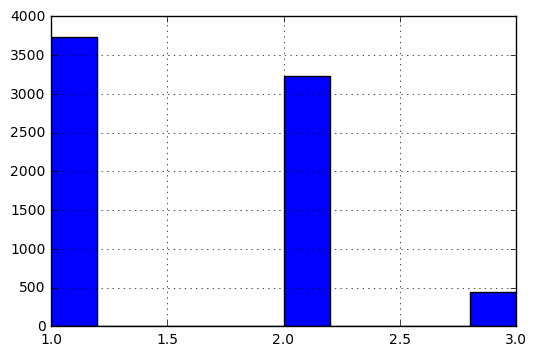

In [148]:
m1 = combo_df_sig.Group.str.contains('Hoshida')


hoshida_df = combo_df_sig[m1]
hoshida_count = combo_df_sig[m1].groupby(['Gene']).Group.nunique().reset_index(name='Count')

hoshida_count.Count.hist()

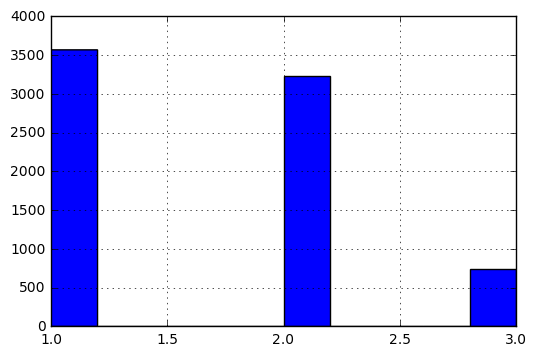

In [147]:
m1 = combo_df_sig.Group.str.contains('S')

mClust_df = combo_df_sig[m1]
mClust_count = mClust_df.groupby(['Gene']).Group.nunique().reset_index(name='Count')
mClust_count.Count.hist()

In [120]:
hoshida_genes = hoshida_count[hoshida_count.Count == 1]
mClust_genes = mClust_count[mClust_count.Count == 1]

In [121]:
len(hoshida_genes), len(mClust_genes)

(3728, 3569)

In [195]:
combo_df.to_pickle('deseq_res_all.pkl')

In [123]:
hoshida_count.to_pickle('Hoshida_count.pkl')
mClust_count.to_pickle('mClust_count.pkl')

In [124]:
! pwd

/cellar/users/mdow/Projects/HCC/RNA_analysis/DESeq_analysis


In [125]:
hoshida_genes.to_pickle('Hoshida_exclusive.pkl')
mClust_genes.to_pickle('mClust_exclusive.pkl')

## MAD for genes

In [141]:
gene_mad_srt = pd.read_csv('/cellar/users/mdow/Projects/HCC/RNA_analysis/iCluster/human_tumor_gene_MAD.csv',index_col=0)

In [142]:
gene_mad_srt.head()

,hgnc,MAD
1949,cyp2e1,3.446874
7566,spink1,3.308388
1814,crp,3.155506
3712,igf2,3.010561
289,akr1b10,2.960099


In [143]:
hgnc_to_mad_dict = gene_mad_srt.set_index(['hgnc'])['MAD']

In [149]:
hoshida_df.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Group,Gene
aaas,1365.057417,0.142217,0.060424,2.353671,1.858906e-02,0.042776,Hoshida_C3,aaas
aars2,922.222739,0.415153,0.080382,5.164739,2.407744e-07,0.000002,Hoshida_C3,aars2
aass,2569.756845,0.815316,0.193807,4.206840,2.589658e-05,0.000144,Hoshida_C3,aass
abca1,3467.150250,-0.421690,0.123062,-3.426651,6.110735e-04,0.002302,Hoshida_C3,abca1
abca3,393.906364,-0.820959,0.202630,-4.051512,5.088781e-05,0.000261,Hoshida_C3,abca3


In [186]:
combo_df['MAD'] = combo_df.Gene.map(hgnc_to_mad_dict)

In [187]:
combo_df.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Group,Gene,MAD
a1cf,2864.325319,0.227486,0.173142,1.313869,0.188890,0.287550,S3,a1cf,0.746410
aaas,1365.057417,0.074438,0.083258,0.894070,0.371285,0.481862,S3,aaas,0.426065
aacs,645.649377,-0.148196,0.173258,-0.855347,0.392359,0.503239,S3,aacs,0.592575
aadac,13936.237951,0.449251,0.239203,1.878117,0.060365,0.115710,S3,aadac,1.279717
aadat,773.459225,-0.423161,0.308258,-1.372749,0.169830,0.264216,S3,aadat,0.831357


In [189]:
m1 = combo_df.Group.str.contains('Tcga')
m2 = combo_df.padj < 0.05

tcga_sig = combo_df[(m1&m2)]

In [191]:
x = set(tcga_sig.Gene[tcga_sig.Group == 'Tcga_c1'])
y = set(tcga_sig.Gene[tcga_sig.Group == 'Tcga_c2'])
z = set(tcga_sig.Gene[tcga_sig.Group == 'Tcga_c3'])

<matplotlib_venn._common.VennDiagram instance at 0x7f9418396dd0>

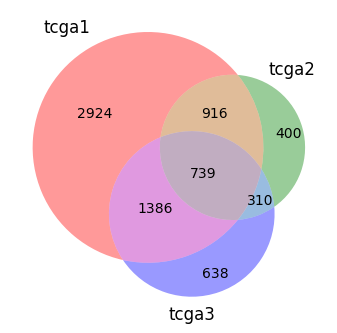

In [193]:
venn3((x,y,z),('tcga1','tcga2','tcga3'))

In [190]:
tcga_sig.Group.unique()

array(['Tcga_c3', 'Tcga_c1', 'Tcga_c2'], dtype=object)

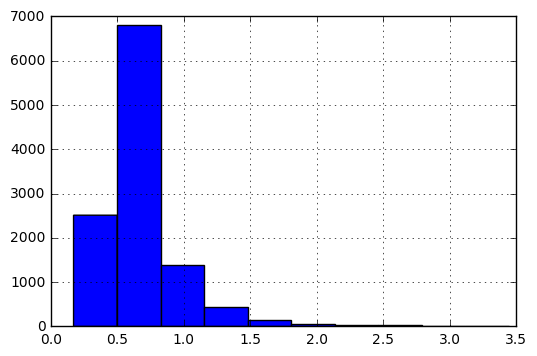

In [161]:
m1 = combo_df.Group.str.contains('Hoshida')
m2 = combo_df.padj < 0.05
combo_df[(m1&m2)].MAD.hist()

In [162]:
m3 = combo_df.padj > 0.05

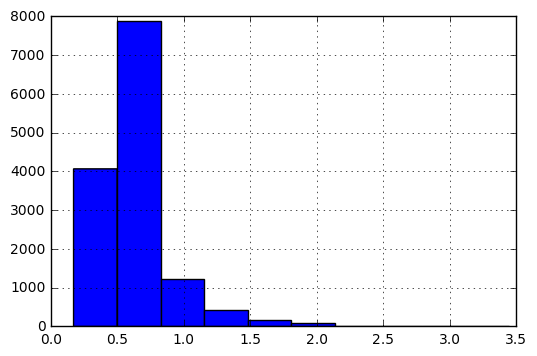

In [163]:
combo_df[(m1&m3)].MAD.hist()

In [165]:
combo_df['Sig'] = combo_df.padj < 0.05

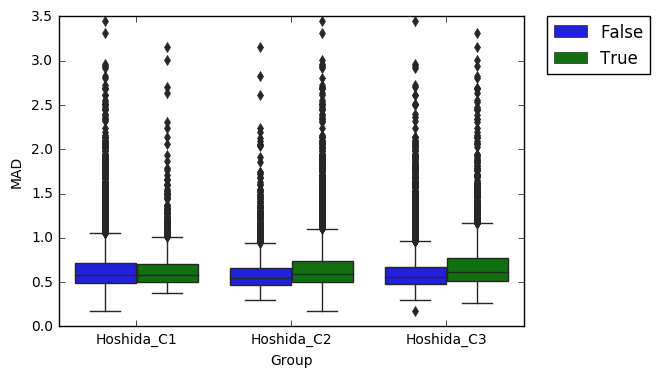

In [168]:
sns.boxplot(data=combo_df[(m1)],x='Group',y='MAD',hue='Sig',order=['Hoshida_C1','Hoshida_C2','Hoshida_C3'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [170]:
hoshida_count['MAD'] = hoshida_count.Gene.map(hgnc_to_mad_dict) 

In [171]:
hoshida_count.to_pickle('Hoshida_count.pkl')

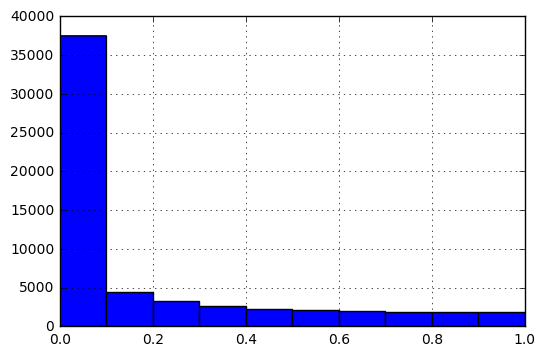

In [132]:
combo_df.pvalue.hist()

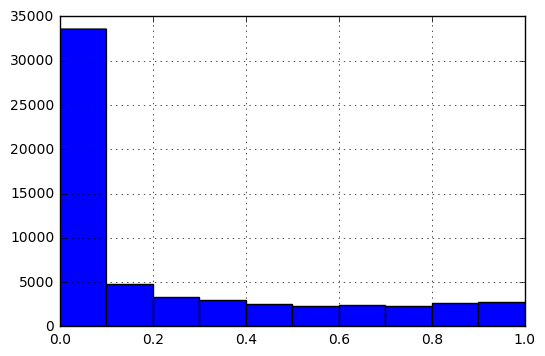

In [133]:
combo_df.padj.hist()

In [250]:
def plot_volcano_FC(df,title,p):
    df['FC'] = [2**i for i in df.log2FoldChange]
    
    plt.subplots(figsize=(5,5))
    x = df.FC
    y = -np.log10(df.padj)
    plt.scatter(x,y,color='black')
    dash_y = -np.log10(0.05)
    plt.plot([min(x)-0.5,max(x)+0.5],[dash_y,dash_y],linestyle='--',color='r')
    
    # Change the x-axis to FC instead of log2
    m1 = df.padj <= p
    m2 = df.FC >= 4
    m3 = df.FC <= 0.25
    
    sig_df = df[m1&(m2|m3)]
    x2 = sig_df.FC
    y2 = -np.log10(sig_df.padj) 
    plt.scatter(x2, y2, color='r')
    
    # Add lines for threshold
    
    plt.plot([1/1.5,1/1.5],[min(y),max(y)],linestyle='--',color='b')
    plt.plot([1.5,1.5],[min(y),max(y)],linestyle='--',color='b')
    
    plt.plot([2,2],[min(y),max(y)],linestyle='--',color='r')
    plt.plot([1/2,1/2],[min(y),max(y)],linestyle='--',color='r')
    
    
    plt.xlabel('FoldChange')
    plt.ylabel('-log10(adjusted p-value)')
    plt.title(title)

In [346]:
def plot_volcano_label(df,title,p):
    plt.subplots(figsize=(8,8))
    x = df.log2FoldChange
    y = -np.log10(df.padj)
    plt.scatter(x,y,color='black')
    dash_y = -np.log10(0.05)
    plt.plot([min(x)-0.5,max(x)+0.5],[dash_y,dash_y],linestyle='--',color='r')
    
    # Change the x-axis to FC instead of log2
    m1 = df.padj <= p
    m2 = df.log2FoldChange >= 1
    m3 = df.log2FoldChange <= -1
    
    sig_df = df[m1&(m2|m3)]
    x2 = sig_df.log2FoldChange
    y2 = -np.log10(sig_df.padj) 
    plt.scatter(x2, y2, color='r')
    
    # Add lines for threshold
    plt.plot([np.log2(1/1.5),np.log2(1/1.5)],[min(y),max(y)],linestyle='--',color='b')
    plt.plot([np.log2(1.5),np.log2(1.5)],[min(y),max(y)],linestyle='--',color='b')
    
    plt.plot([np.log2(2),np.log2(2)],[min(y),max(y)],linestyle='--',color='r')
    plt.plot([-np.log2(2),-np.log2(2)],[min(y),max(y)],linestyle='--',color='r')
    
    #plt.plot([1/1.5,1/1.5],[min(y),max(y)],linestyle='--',color='b')
    #plt.plot([1.5,1.5],[min(y),max(y)],linestyle='--',color='b')
    
    #plt.plot([2,2],[min(y),max(y)],linestyle='--',color='r')
    #plt.plot([-2,-2],[min(y),max(y)],linestyle='--',color='r')
    
    
    plt.xlabel('log2 FoldChange')
    plt.ylabel('-log10(adjusted p-value)')
    plt.title(title)


    m1 = df.log2FoldChange < -1.0
    m2 = df.log2FoldChange > 1.0
    df_points = df[(m1|m2)]
    for label, x, y in zip(df_points.Gene.tolist(), df_points.log2FoldChange.tolist(),df_points.padj.tolist()):
        plt.annotate(
            label,
            xy=(x, -np.log10(y)), xytext=(-1, 1),
            textcoords='offset points', ha='right', va='bottom')

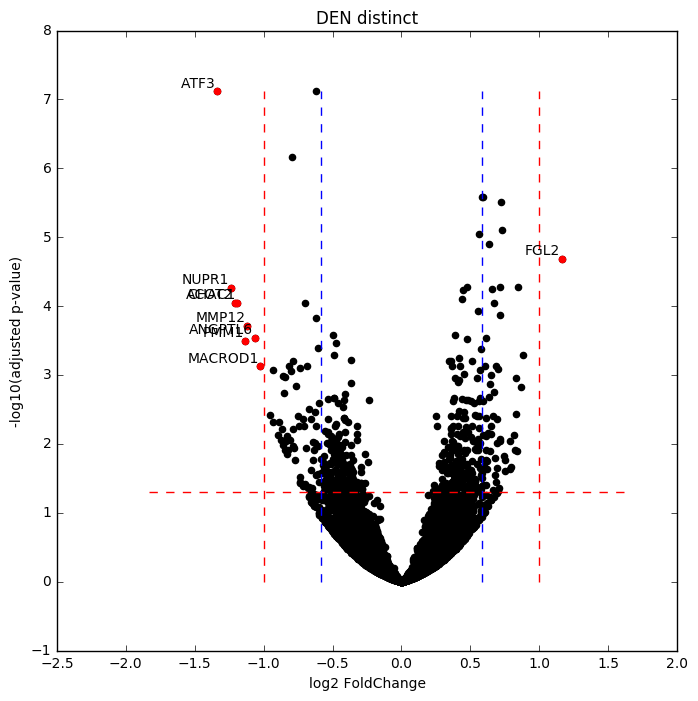

In [347]:
plot_volcano_label(den_out2,'DEN distinct',0.05)


In [349]:
den_points.sort_values(['padj'])

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Gene
ATF3,443.373256,-1.335269,0.197096,-6.774716,1.246506e-11,7.673312e-08,ATF3
FGL2,985.009482,1.162963,0.208176,5.586456,2.317509e-08,2.059106e-05,FGL2
NUPR1,514.234963,-1.240063,0.231536,-5.355804,8.517680e-08,5.405685e-05,NUPR1
ACOT2,189.374564,-1.207458,0.231479,-5.216277,1.825550e-07,9.011116e-05,ACOT2
CHAC1,103.199020,-1.190753,0.229167,-5.195995,2.036272e-07,9.046141e-05,CHAC1
MMP12,507.513353,-1.122480,0.224120,-5.008386,5.488824e-07,1.950728e-04,MMP12
ANGPTL6,109.383193,-1.063878,0.216747,-4.908399,9.182311e-07,2.893180e-04,ANGPTL6
PMM1,93.797333,-1.137128,0.233613,-4.867580,1.129731e-06,3.237956e-04,PMM1
MACROD1,85.132268,-1.026824,0.222417,-4.616668,3.899507e-06,7.531348e-04,MACROD1


## Human

In [8]:
allfnames = pd.Series(os.listdir('.'))

myFnames = allfnames[allfnames.str.contains('^group')].tolist()

tmp = pd.read_csv(myFnames[0],index_col=0)

In [23]:
myFnames[0].split('.')[0]

'group1_vs_3'

In [65]:
for f in myFnames:
    tmp = pd.read_csv(f,index_col=0)
    groups = f.split('.')[0]
    tmp['Groups'] = groups
    if myFnames.index(f) == 0:
        combo = tmp
    else:
        combo = pd.concat([combo,tmp])

In [66]:
combo.shape

(25584, 7)

In [67]:
combo.Groups.value_counts()

group1_vs_3    8528
group1_vs_2    8528
group2_vs_3    8528
Name: Groups, dtype: int64

In [68]:
combo['Gene'] = [g.upper() for g in combo.index]

In [69]:
combo.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Groups,Gene
a1cf,2888.275685,0.297718,0.110662,2.690337,7.137996e-03,1.552878e-02,group1_vs_3,A1CF
aaas,1775.394211,-0.045714,0.048685,-0.938979,3.477416e-01,4.312119e-01,group1_vs_3,AAAS
aacs,983.399582,-0.310579,0.080497,-3.858286,1.141850e-04,3.997414e-04,group1_vs_3,AACS
aadac,12321.743812,0.584359,0.146922,3.977338,6.969113e-05,2.576185e-04,group1_vs_3,AADAC
aadat,293.701766,0.998724,0.127864,7.810824,5.681547e-15,1.552956e-13,group1_vs_3,AADAT


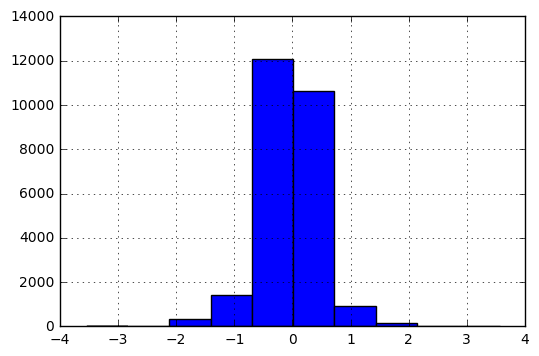

In [70]:
combo.log2FoldChange.hist()

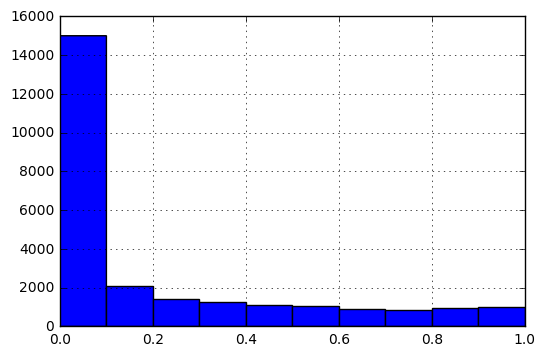

In [71]:
combo.padj.hist()

In [259]:
m1 = combo.padj <0.01

fc_thres = 1.5

m2 = combo.log2FoldChange > fc_thres
m3 = combo.log2FoldChange < -fc_thres
print combo[m1&(m2|m3)].Groups.value_counts()

tmp = combo[m1&(m2|m3)]

m4 = combo.Groups == 'group1_vs_2'
x = set(combo[m1&(m2|m3)&m4].Gene)
m5 = combo.Groups == 'group1_vs_3'
y = set(combo[m1&(m2|m3)&m5].Gene)
m6 = combo.Groups == 'group2_vs_3'
z = set(combo[m1&(m2|m3)&m6].Gene)

group1_vs_2    233
group2_vs_3    164
group1_vs_3     40
Name: Groups, dtype: int64


<matplotlib_venn._common.VennDiagram instance at 0x7fc7676864d0>

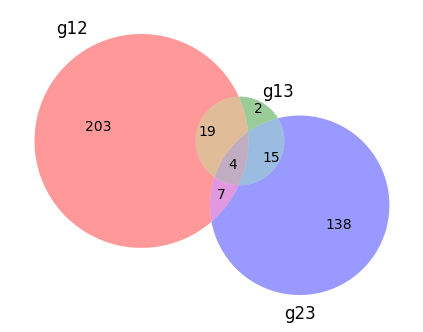

In [102]:
from matplotlib_venn import venn3
venn3((x,y,z),('g12','g13','g23'))

## Create a table of gene and significance

In [108]:
combo[combo.Gene == 'TP53']

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Groups,Gene
tp53,1713.158536,-0.247573,0.095129,-2.602496,0.009255,0.019502,group1_vs_3,TP53
tp53,1489.453077,-0.510047,0.135569,-3.762265,0.000168,0.000520,group1_vs_2,TP53
tp53,1104.887555,0.010557,0.133636,0.078999,0.937033,0.962241,group2_vs_3,TP53


In [109]:
combo_uS = combo.pivot(index='Gene',columns='Groups',values='padj')

In [114]:
combo_uS.head()

Groups,group1_vs_2,group1_vs_3,group2_vs_3
Gene,,,
A1CF,8.656482e-02,1.552878e-02,0.027975
AAAS,1.017479e-02,4.312119e-01,0.224228
AACS,6.971956e-07,3.997414e-04,0.790752
AADAC,3.361327e-05,2.576185e-04,0.246592
AADAT,2.212703e-18,1.552956e-13,0.697526


## These differentially expressed genes should be more similar in mice?

In [139]:
# already logged 
mouse = pd.read_csv('corr_exp_mouse.csv',skiprows=1,index_col=0)
mouse = mouse.iloc[1:,:]

human = pd.read_csv('corr_exp_human.csv',index_col=0)

myClust = pd.read_csv('human_mouseClust.csv')
pidToClust_dict = myClust.set_index(['PID'])['myClust'].to_dict()
#human_raw = read.csv('tcga_lihc_rawcounts.csv',row.names=1,check.names=FALSE)

# get mouse model info
mouse_info = pd.read_csv('corr_exp_mouse.csv',index_col=0,header=None).iloc[0:2,:].T

mouseToModel_dict = mouse_info.set_index(['sample'])['strain'].to_dict()

In [164]:
from scipy.spatial.distance import cdist
def corr(df1,df2):
    myM=cdist(df1.T,df2.T,'correlation')
    return 1-pd.DataFrame(data=myM,index=df1.columns,columns=df2.columns)

def get_z(inZDf):
    tmp = stats.zscore(inZDf)
    outZDf = pd.DataFrame(tmp)
    outZDf.columns = inZDf.columns
    outZDf.index = inZDf.index
    return outZDf

In [148]:
human.shape, mouse.shape

((9175, 183), (9175, 56))

### Correlation with all (original)

In [162]:
corrDf_all =corr(df1=human,df2=mouse)


In [234]:
def plot_box_corr(corr_df,plot_title,g_size):
    corr_df_z = get_z(corr_df.T)
    corr_df_z_S = corr_df_z.stack().reset_index()
    corr_df_z_S.columns = ['Mouse','Human','Corr_z']

    corr_df_z_S['Human_clust'] = corr_df_z_S.Human.map(pidToClust_dict)
    corr_df_z_S['Mouse_model'] = corr_df_z_S.Mouse.map(mouseToModel_dict)
    ax = sns.boxplot(data=corr_df_z_S, x='Human_clust',y='Corr_z',hue='Mouse_model')
    plot_title_2 = plot_title+', gene N='+str(g_size)
    ax.set_title(plot_title_2)
    ax.set_xticklabels([1,2,3])
    # Put the legend out of the figure
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

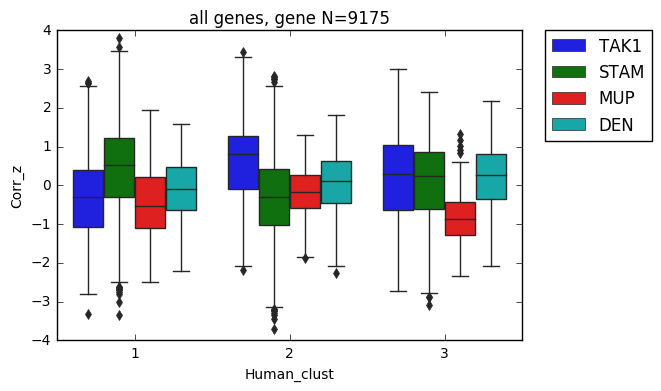

In [235]:
plot_box_corr(corrDf_all,'all genes',9175)

## With just DEGs

In [205]:
g12 = [g.lower() for g in list(x)]
g13 = [g.lower() for g in list(y)]
g23 = [g.lower() for g in list(z)]

In [ ]:
# Group 1: high STAM correlation, some DEN
# Group 2: high TAK1 correlation, some DEN
# Group 3: high TAK1 correlation, some STAM and some DEN

In [211]:
corrDf_g12 =corr(df1=human.loc[g12,:],df2=mouse.loc[g12,:])
corrDf_g13 =corr(df1=human.loc[g13,:],df2=mouse.loc[g13,:])
corrDf_g23 =corr(df1=human.loc[g23,:],df2=mouse.loc[g23,:])

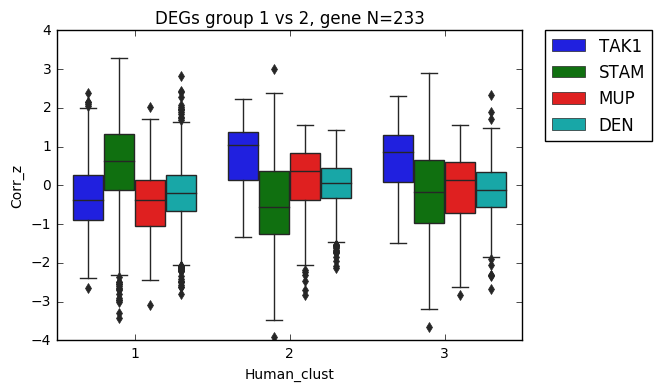

In [236]:
plot_box_corr(corrDf_g12,'DEGs group 1 vs 2',len(g12)) # expected highest STAM in clust1 and highest with TAK1 in 2

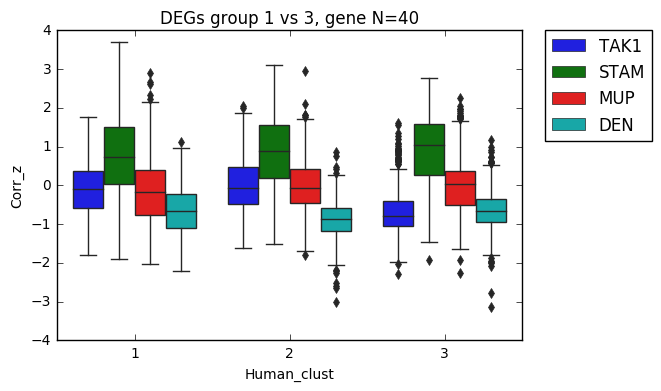

In [237]:
plot_box_corr(corrDf_g13,'DEGs group 1 vs 3',len(g13))

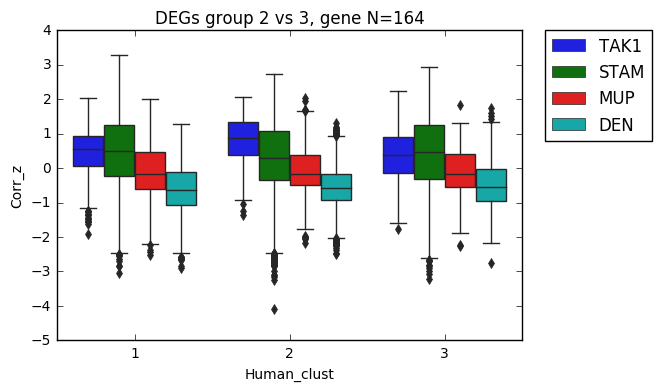

In [238]:
plot_box_corr(corrDf_g23,'DEGs group 2 vs 3',len(g23)) # expected highest STAM in clust1 and highest with TAK1 in 2

## 1 vs all

In [250]:
allfnames = pd.Series(os.listdir('.'))

vsAll_fnames = allfnames[allfnames.str.contains('and')].tolist()


In [251]:
vsAll_fnames

['group2_vs_1and3.csv', 'group3_vs_1and2.csv', 'group1_vs_2and3.csv']

In [254]:
for f in vsAll_fnames:
    tmp = pd.read_csv(f,index_col=0)
    groups = f.split('.')[0]
    tmp['Groups'] = groups
    if vsAll_fnames.index(f) == 0:
        combo_2 = tmp
    else:
        combo_2 = pd.concat([combo_2,tmp])

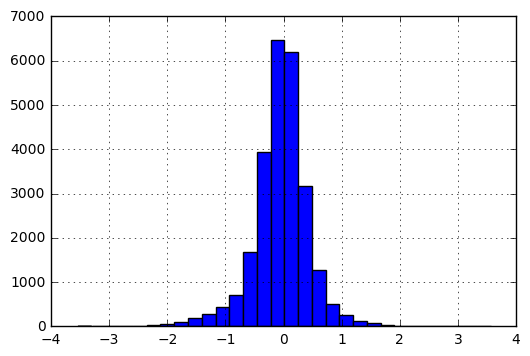

In [275]:
combo.log2FoldChange.hist(bins=30)

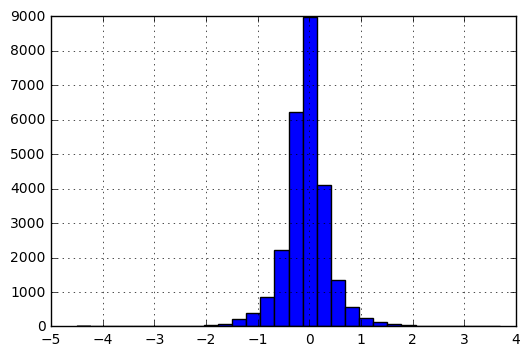

In [258]:
combo_2.log2FoldChange.hist(bins=30)

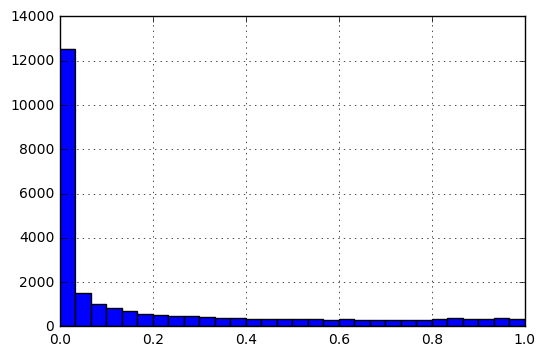

In [260]:
combo_2.padj.hist(bins=30)

In [261]:
combo_2.Groups.unique()

array(['group2_vs_1and3', 'group3_vs_1and2', 'group1_vs_2and3'], dtype=object)

In [263]:
combo_2.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Groups
A1CF,2766.126128,0.114977,0.138990,0.827231,0.408106,0.514994,group2_vs_1and3
AAAS,1573.795881,-0.183968,0.066165,-2.780457,0.005428,0.014336,group2_vs_1and3
AACS,805.305277,-0.528751,0.121624,-4.347429,0.000014,0.000082,group2_vs_1and3
AADAC,13298.383508,0.454741,0.183997,2.471458,0.013456,0.031141,group2_vs_1and3
AADAT,378.474807,0.863117,0.191896,4.497841,0.000007,0.000044,group2_vs_1and3


In [264]:
combo_2['Gene'] = combo_2.index

In [302]:
m1 = combo_2.padj <0.01

fc_thres = 1.2

m2 = combo_2.log2FoldChange > fc_thres
m3 = combo_2.log2FoldChange < -fc_thres
print combo_2[m1&(m2|m3)].Groups.value_counts()

#tmp = combo_2[m1&(m2|m3)]

m4 = combo_2.Groups == 'group1_vs_2and3'
x2 = set(combo_2[m1&(m2|m3)&m4].Gene)
m5 = combo_2.Groups == 'group2_vs_1and3'
y2 = set(combo_2[m1&(m2|m3)&m5].Gene)
m6 = combo_2.Groups == 'group3_vs_1and2'
z2 = set(combo_2[m1&(m2|m3)&m6].Gene)

group1_vs_2and3    494
group2_vs_1and3    117
group3_vs_1and2     54
Name: Groups, dtype: int64


<matplotlib_venn._common.VennDiagram instance at 0x7fc72c59c248>

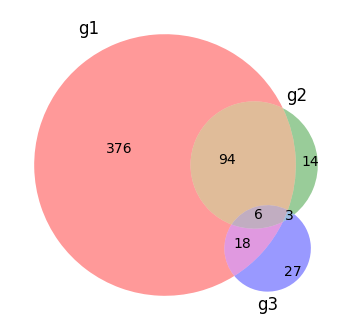

In [298]:
from matplotlib_venn import venn3
venn3((x2,y2,z2),('g1','g2','g3'))

## Compare pairwise with 1vsAll?

<matplotlib_venn._common.VennDiagram instance at 0x7fc72c610170>

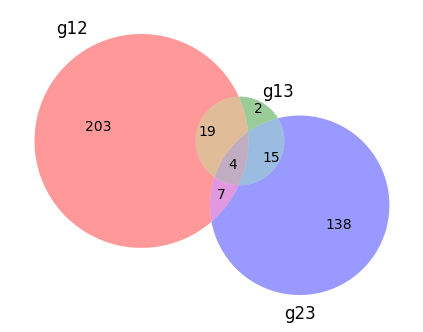

In [290]:
from matplotlib_venn import venn3
venn3((x,y,z),('g12','g13','g23'))

<matplotlib_venn._common.VennDiagram instance at 0x7fc72c17c4d0>

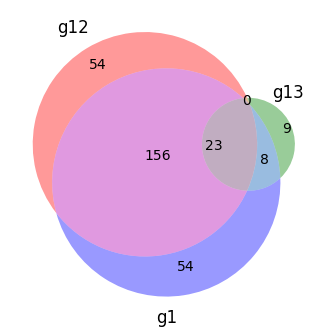

In [291]:
venn3((x,y,x2),('g12','g13','g1')) #abs(FC) > 1.5
# DEGs between group1 vs group2+3 is mostly from group 1 vs group2? 

In [303]:
g1 = [g.lower() for g in list(x2)]
g2 = [g.lower() for g in list(y2)]
g3 = [g.lower() for g in list(z2)]

In [305]:
corrDf_g1 =corr(df1=human.loc[g1,:],df2=mouse.loc[g1,:])
corrDf_g2 =corr(df1=human.loc[g2,:],df2=mouse.loc[g2,:])
corrDf_g3 =corr(df1=human.loc[g3,:],df2=mouse.loc[g3,:])

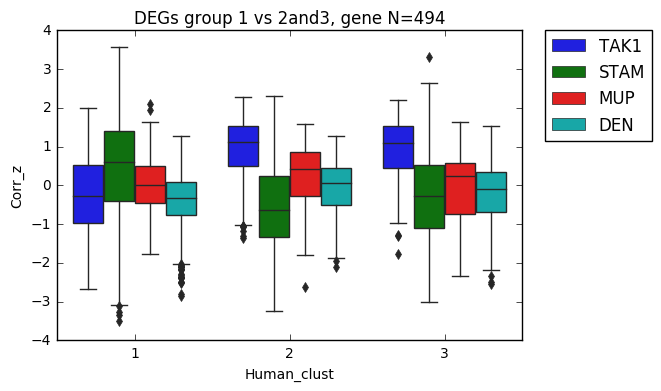

In [306]:
plot_box_corr(corrDf_g1,'DEGs group 1 vs 2and3',len(g1))

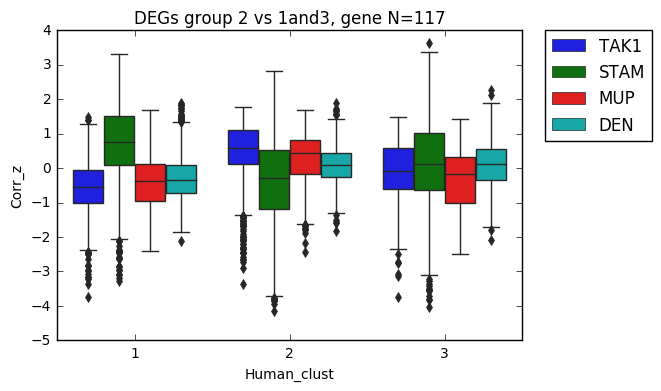

In [307]:
plot_box_corr(corrDf_g2,'DEGs group 2 vs 1and3',len(g2))

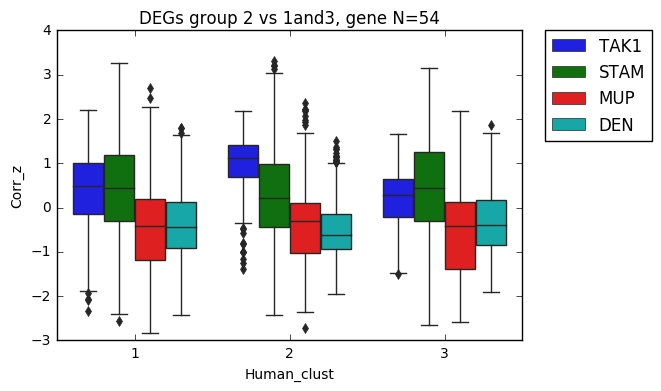

In [308]:
plot_box_corr(corrDf_g3,'DEGs group 2 vs 1and3',len(g3))